# Exercise 1.5: Text Mining Analysis of 20th Century Timeline

## Objective
In this exercise, I will analyze a Wikipedia article about the 20th century timeline using text mining techniques including tokenization, word frequency analysis, POS tagging, and sentiment analysis.

## 1. Import Libraries and Setup

Here I'm importing all the libraries I need and downloading the required NLTK data packages for my analysis.

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/saurabh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saurabh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 2. Configure Matplotlib for Inline Display

I'm configuring matplotlib to display plots directly in the notebook.

In [2]:
%matplotlib inline

## 3. Load and Prepare Text Data

Now I'm loading the scraped text file and preparing it for analysis by removing line breaks.

In [3]:
with open('20th_century_events.txt', 'r', errors='ignore') as file: 
    data = file.read().replace('\n', ' ')

print("Text loaded successfully!")
print(f"Total characters: {len(data)}")

Text loaded successfully!
Total characters: 101768


## 4. Tokenization

Here I'm breaking the text into individual words and punctuation marks (tokens) so I can analyze them.

In [4]:
from nltk.tokenize import word_tokenize

tokenized_word = word_tokenize(data)

print(f"Total words: {len(tokenized_word)}")

Total words: 19032


## 5. Word Frequency Analysis (Before Filtering)

I'm calculating the frequency distribution of all tokens to identify the most common words (including stop words and punctuation).

In [5]:
from nltk.probability import FreqDist

dist_words = FreqDist(tokenized_word)

print(dist_words.most_common(10))

[('.', 1234), (':', 1029), ('the', 812), ('of', 740), (',', 532), ('in', 401), ('The', 316), ('and', 259), ('to', 167), ('War', 144)]


## 6. Visualize Top 10 Most Common Words

I'm creating a frequency distribution plot to show the 10 most frequent words in the text.

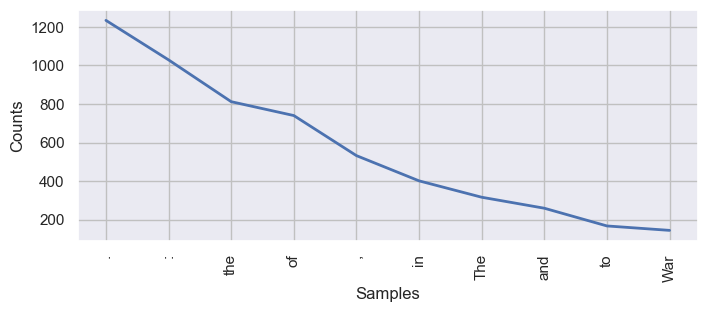

In [6]:
plt.figure(figsize=(8, 3))
dist_words.plot(10, cumulative=False)
plt.show()

## 7. Remove Stop Words and Punctuation

Now I'm filtering out:
- Common stop words (the, of, in, etc.)
- Punctuation marks
- I'm keeping only alphabetic words and converting them to lowercase

This will help me see more meaningful content words.

In [7]:
filtered_words = []

for word in tokenized_word:
    if word not in stop_words and word.isalpha():
        filtered_words.append(word.lower())

print(f"Words after filtering: {len(filtered_words)}")
print(f"First 20 filtered words: {filtered_words[:20]}")

Words after filtering: 10134
First 20 filtered words: ['timeline', 'century', 'wikipedia', 'jump', 'content', 'main', 'menu', 'main', 'menu', 'move', 'sidebar', 'hide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'us', 'contribute']


## 8. Visualize Filtered Words

I'm plotting the top 10 most common words after removing stop words and punctuation.

[('the', 316), ('first', 171), ('war', 151), ('edit', 117), ('begins', 115), ('march', 97), ('may', 94), ('october', 93), ('united', 87), ('september', 86)]


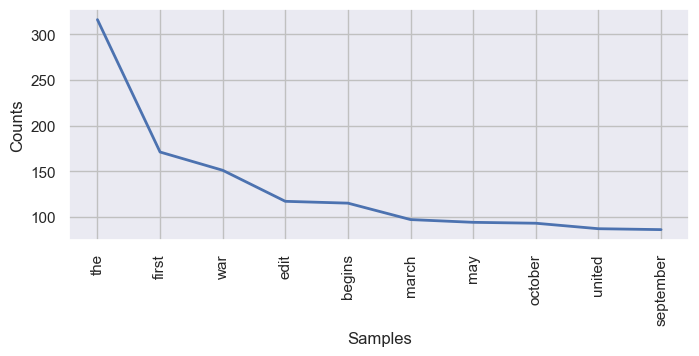

In [8]:
dist_filtered = FreqDist(filtered_words)

print(dist_filtered.most_common(10))

plt.figure(figsize=(8, 3))
dist_filtered.plot(10, cumulative=False)
plt.show()

## 9. Part-of-Speech (POS) Tagging

I'm using TextBlob to identify the grammatical role of each word (noun, verb, adjective, etc.).

**Common POS Tags I'll see:**
- **NN**: Noun (singular)
- **NNP**: Proper noun
- **VB**: Verb
- **JJ**: Adjective
- **IN**: Preposition
- **DT**: Determiner

In [9]:
blob = TextBlob(data)
pos_tags = blob.tags

print(f"Total POS tags: {len(pos_tags)}")
print(f"First 20 tags: {pos_tags[:20]}")

Total POS tags: 15966
First 20 tags: [('Timeline', 'NN'), ('of', 'IN'), ('the', 'DT'), ('20th', 'JJ'), ('century', 'NN'), ('Wikipedia', 'NNP'), ('Jump', 'NNP'), ('to', 'TO'), ('content', 'VB'), ('Main', 'NNP'), ('menu', 'NN'), ('Main', 'NNP'), ('menu', 'NN'), ('move', 'NN'), ('to', 'TO'), ('sidebar', 'VB'), ('hide', 'JJ'), ('Navigation', 'NNP'), ('Main', 'NNP'), ('pageContentsCurrent', 'NN')]


## 10. Count POS Tag Frequencies

Here I'm calculating how many times each part-of-speech appears in the text.

In [10]:
pos_counts = Counter(tag for word, tag in pos_tags)

print(pos_counts.most_common(10))

[('NNP', 5552), ('NN', 1847), ('IN', 1746), ('CD', 1705), ('DT', 1354), ('JJ', 948), ('VBZ', 653), ('NNS', 523), ('CC', 263), ('VBN', 262)]


## 11. Visualize Top 10 POS Tags

I'm creating a bar chart to show the most common parts of speech in the timeline.

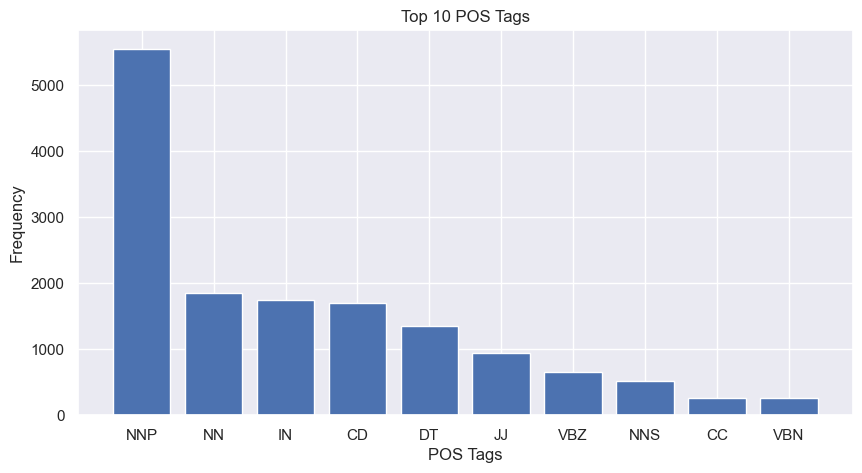

In [11]:
plt.figure(figsize=(10, 5))
pos_common = pos_counts.most_common(10)
tags = [item[0] for item in pos_common]
counts = [item[1] for item in pos_common]

plt.bar(tags, counts)
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Top 10 POS Tags')
plt.show()

## 12. Extract Nouns, Verbs, and Adjectives

I'm separating words by their grammatical function for detailed analysis:
- **Nouns**: NN, NNS, NNP, NNPS (singular, plural, proper nouns)
- **Verbs**: VB, VBD, VBG, VBN, VBP, VBZ (base form, past tense, gerund, etc.)
- **Adjectives**: JJ, JJR, JJS (base, comparative, superlative)

In [12]:
# Extract nouns (NN, NNS, NNP, NNPS)
nouns = [word for word, tag in pos_tags if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

# Extract verbs (VB, VBD, VBG, VBN, VBP, VBZ)
verbs = [word for word, tag in pos_tags if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]

# Extract adjectives (JJ, JJR, JJS)
adjectives = [word for word, tag in pos_tags if tag in ['JJ', 'JJR', 'JJS']]

print(f"Total nouns: {len(nouns)}")
print(f"Total verbs: {len(verbs)}")
print(f"Total adjectives: {len(adjectives)}")

Total nouns: 8000
Total verbs: 1362
Total adjectives: 974


## 13. Top 15 Most Common Nouns

I'm visualizing the most frequently occurring nouns to understand key topics in 20th century history.

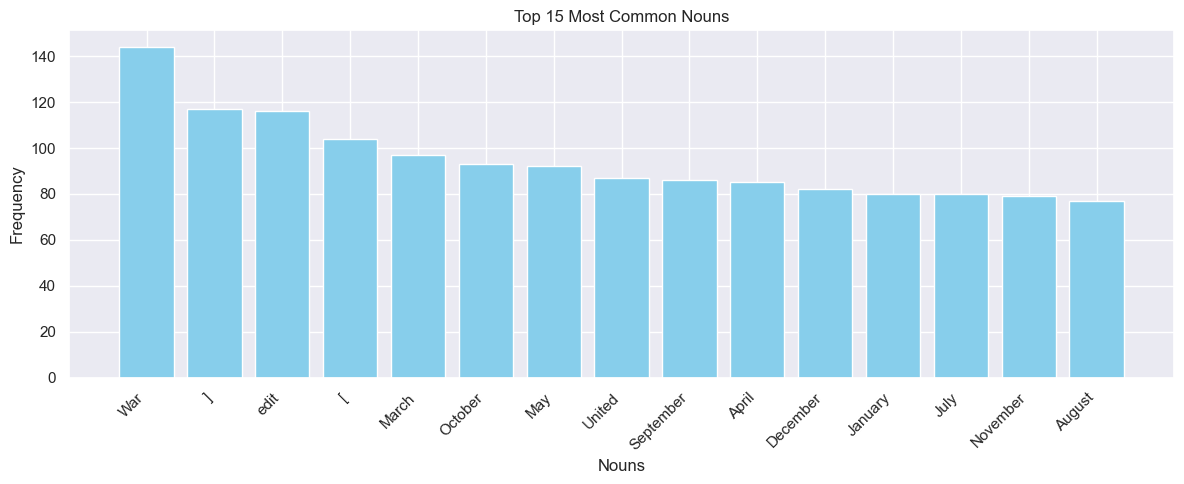

In [13]:
noun_freq = FreqDist(nouns)

plt.figure(figsize=(12, 5))
top_nouns = noun_freq.most_common(15)
words = [item[0] for item in top_nouns]
counts = [item[1] for item in top_nouns]

plt.bar(words, counts, color='skyblue')
plt.xlabel('Nouns')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Nouns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 14. Top 15 Most Common Verbs

Here I'm analyzing the most common action words in the timeline.

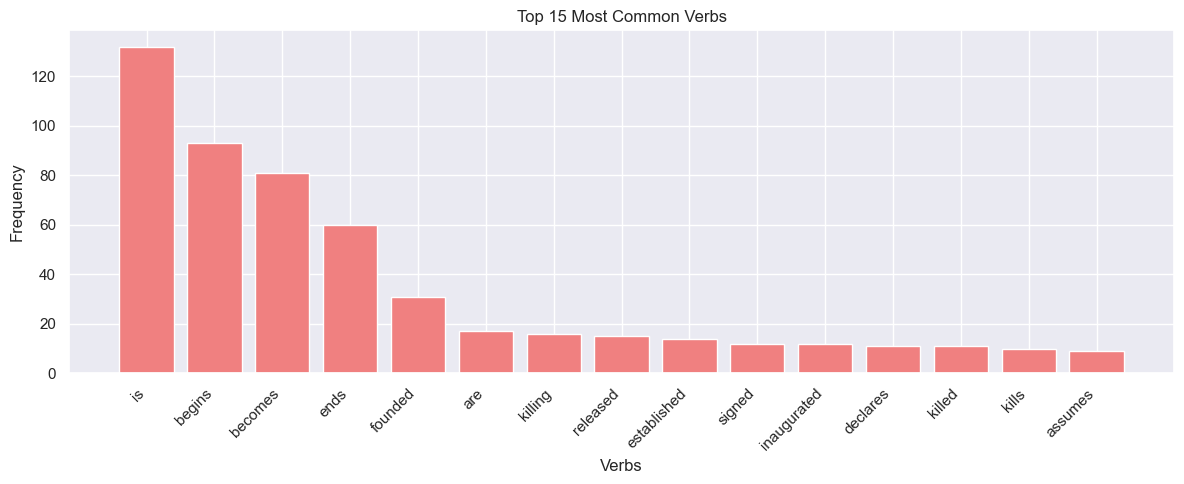

In [14]:
verb_freq = FreqDist(verbs)

plt.figure(figsize=(12, 5))
top_verbs = verb_freq.most_common(15)
words = [item[0] for item in top_verbs]
counts = [item[1] for item in top_verbs]

plt.bar(words, counts, color='lightcoral')
plt.xlabel('Verbs')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Verbs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 15. Top 15 Most Common Adjectives

I'm examining the descriptive words used most frequently in the text.

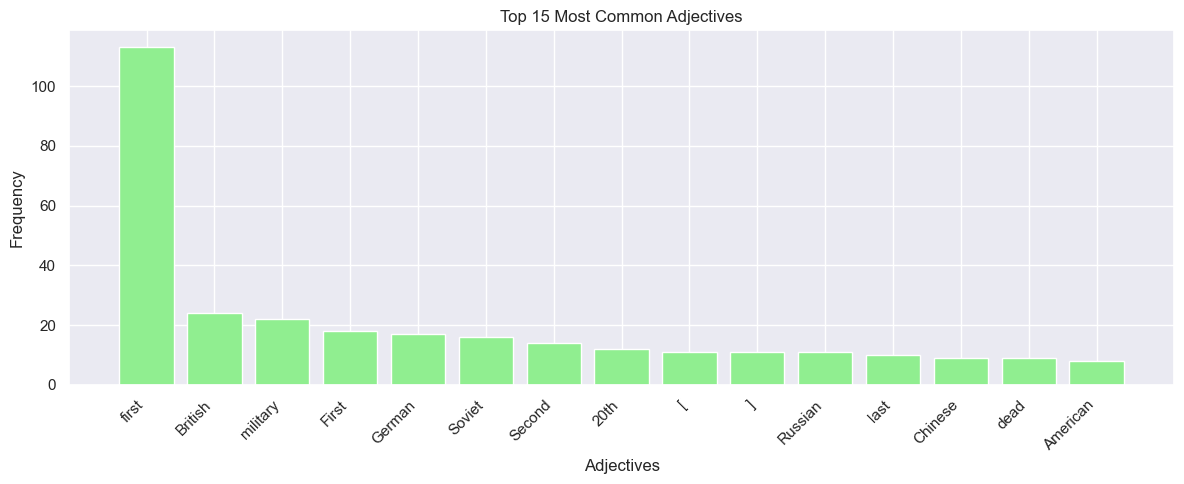

In [15]:
adj_freq = FreqDist(adjectives)

plt.figure(figsize=(12, 5))
top_adj = adj_freq.most_common(15)
words = [item[0] for item in top_adj]
counts = [item[1] for item in top_adj]

plt.bar(words, counts, color='lightgreen')
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Adjectives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 16. Load Countries List

I'm loading the list of countries I scraped in Exercise 1.4 for mention analysis.

In [16]:
# Load countries list
with open('countries_list.txt', 'r', errors='ignore') as f:
    countries = [line.strip().lower() for line in f.readlines()]

print(f"Total countries loaded: {len(countries)}")
print(f"First 10 countries: {countries[:10]}")

Total countries loaded: 373
First 10 countries: ['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria']


## 17. Count Country Mentions

I'm searching for each country name in the text and counting occurrences to identify which countries are most prominent in 20th century events.

In [17]:
# Convert text to lowercase for matching
data_lower = data.lower()

# Count mentions of each country
country_mentions = {}

for country in countries:
    count = data_lower.count(country)
    if count > 0:
        country_mentions[country] = count

# Sort by frequency
sorted_countries = sorted(country_mentions.items(), key=lambda x: x[1], reverse=True)

print(f"Countries mentioned: {len(sorted_countries)}")
print(f"Top 10 mentioned countries:")
for country, count in sorted_countries[:10]:
    print(f"  {country}: {count}")

Countries mentioned: 154
Top 10 mentioned countries:
  united states: 55
  israel: 35
  china: 34
  russia: 30
  japan: 29
  united kingdom: 28
  india: 25
  germany: 23
  iran: 18
  france: 17


## 18. Visualize Country Mentions

I'm creating a horizontal bar chart showing the top 20 most mentioned countries in the 20th century timeline.

          Country  Mentions
0   united states        55
1          israel        35
2           china        34
3          russia        30
4           japan        29
5  united kingdom        28
6           india        25
7         germany        23
8            iran        18
9          france        17


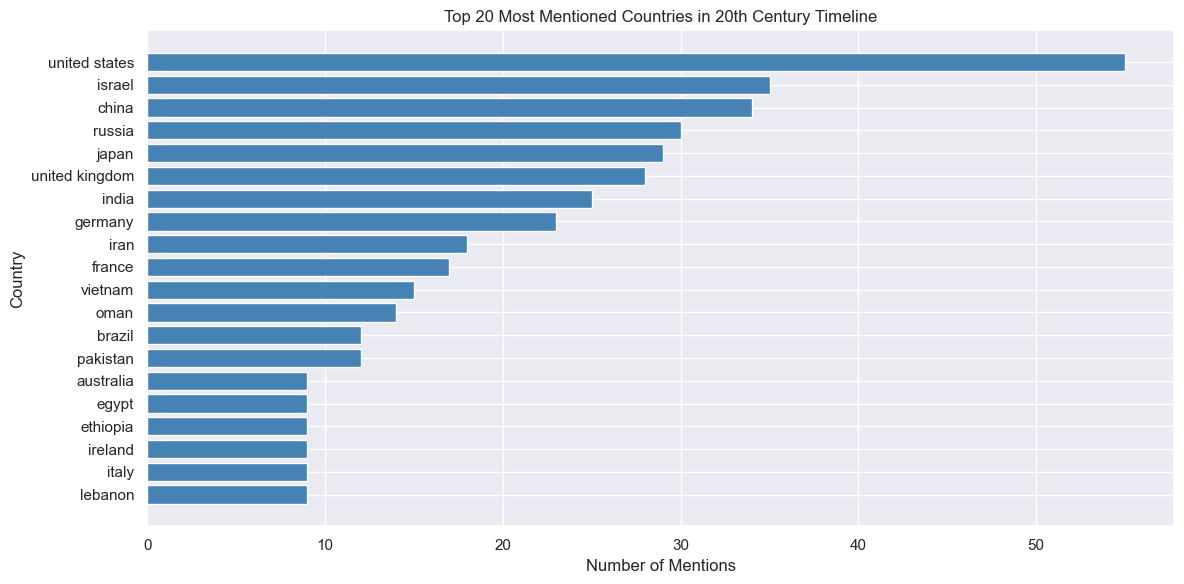

In [18]:
# Create DataFrame
df_countries = pd.DataFrame(sorted_countries, columns=['Country', 'Mentions'])

print(df_countries.head(10))

# Plot top 20 countries
plt.figure(figsize=(12, 6))
top_20 = df_countries.head(20)
plt.barh(top_20['Country'], top_20['Mentions'], color='steelblue')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.title('Top 20 Most Mentioned Countries in 20th Century Timeline')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## BONUS: Sentiment Analysis

### 19. Overall Text Sentiment

I'm analyzing the emotional tone of the entire text using TextBlob's sentiment analyzer.

**Metrics I'm measuring:**
- **Polarity**: Ranges from -1 (very negative) to +1 (very positive), with 0 being neutral
- **Subjectivity**: Ranges from 0 (very objective/factual) to 1 (very subjective/opinion-based)

In [19]:
# Analyze sentiment of the entire text
blob = TextBlob(data)
sentiment = blob.sentiment

print("Overall Text Sentiment Analysis:")
print(f"Polarity: {sentiment.polarity}")
print(f"Subjectivity: {sentiment.subjectivity}")
print()
print("Interpretation:")
print(f"Polarity ranges from -1 (negative) to +1 (positive)")
print(f"Subjectivity ranges from 0 (objective) to 1 (subjective)")

Overall Text Sentiment Analysis:
Polarity: 0.08731081112751636
Subjectivity: 0.2853161462152187

Interpretation:
Polarity ranges from -1 (negative) to +1 (positive)
Subjectivity ranges from 0 (objective) to 1 (subjective)


### 20. Sentence-Level Sentiment Analysis

I'm analyzing the sentiment of individual sentences to identify the most positive and negative statements in the timeline. This helps me understand which specific events were described in more emotional language.

In [20]:
from nltk.tokenize import sent_tokenize

# Tokenize into sentences
sentences = sent_tokenize(data)

# Analyze each sentence
sentence_sentiments = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if len(sentence.split()) > 5:  # Only analyze sentences with more than 5 words
        sentence_sentiments.append({
            'sentence': sentence[:100],  # First 100 characters
            'polarity': blob.sentiment.polarity,
            'subjectivity': blob.sentiment.subjectivity
        })

# Convert to DataFrame
df_sentiment = pd.DataFrame(sentence_sentiments)

print(f"Total sentences analyzed: {len(df_sentiment)}")
print("\n5 Most Positive Sentences:")
print(df_sentiment.nlargest(5, 'polarity')[['sentence', 'polarity']])
print("\n5 Most Negative Sentences:")
print(df_sentiment.nsmallest(5, 'polarity')[['sentence', 'polarity']])

Total sentences analyzed: 1046

5 Most Positive Sentences:
                                              sentence  polarity
227  May 13: The United Kingdom of Great Britain an...       0.8
248  October 24–29: Wall Street Crash of 1929 and t...       0.8
250  1930s[edit] See also: Timeline of the Great De...       0.8
256  September 14: Aided by the Great Depression, t...       0.8
495          Start of the Great Leap Forward in China.       0.8

5 Most Negative Sentences:
                                              sentence  polarity
996  February 9: Torrential rains in Africa lead to...      -1.0
228  May 18: The Bath School disaster, a series of ...      -0.8
626      January 30: Northern Ireland's Bloody Sunday.      -0.8
422  1950s[edit] See also: Timeline of events in th...      -0.6
821  November 9: Fall of the Berlin Wall; the Revol...      -0.6


### 21. Sentiment Distribution Visualization

I'm creating histograms to show:
- How sentiment polarity is distributed across all sentences
- How objective vs subjective the language is throughout the text

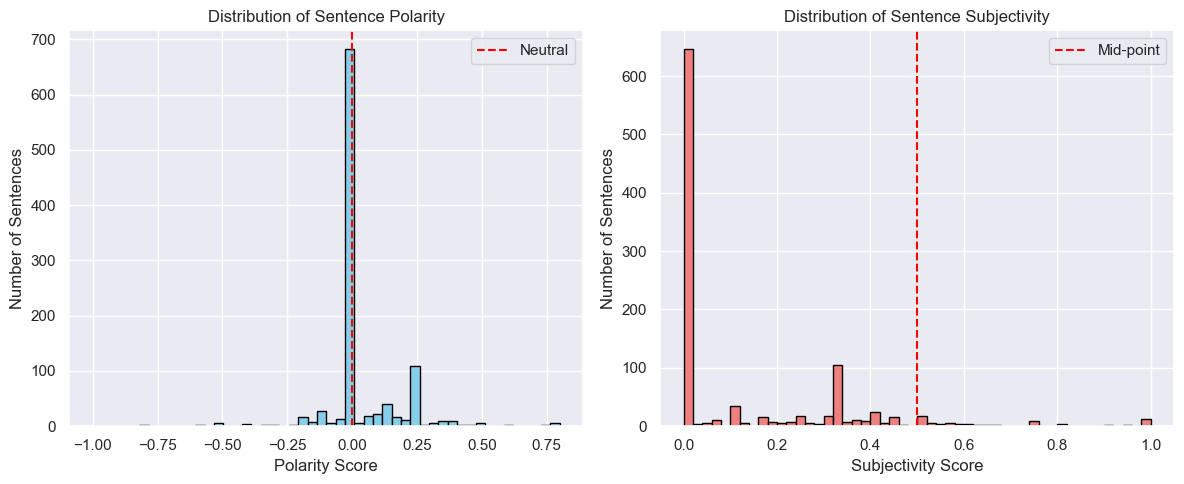

In [21]:
# Plot polarity distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_sentiment['polarity'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Polarity')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_sentiment['subjectivity'], bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Subjectivity Score')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Subjectivity')
plt.axvline(x=0.5, color='red', linestyle='--', label='Mid-point')
plt.legend()

plt.tight_layout()
plt.show()

### 22. Sentiment Analysis Summary Statistics

I'm calculating comprehensive statistics to summarize the overall sentiment patterns in the 20th century timeline.

In [22]:
print("Sentiment Analysis Summary:")
print("="*50)
print(f"Total sentences analyzed: {len(df_sentiment)}")
print(f"\nPolarity Statistics:")
print(f"  Mean: {df_sentiment['polarity'].mean():.3f}")
print(f"  Median: {df_sentiment['polarity'].median():.3f}")
print(f"  Std Dev: {df_sentiment['polarity'].std():.3f}")
print(f"\nSubjectivity Statistics:")
print(f"  Mean: {df_sentiment['subjectivity'].mean():.3f}")
print(f"  Median: {df_sentiment['subjectivity'].median():.3f}")
print(f"  Std Dev: {df_sentiment['subjectivity'].std():.3f}")
print(f"\nSentence Classification:")
print(f"  Positive (polarity > 0.1): {len(df_sentiment[df_sentiment['polarity'] > 0.1])}")
print(f"  Neutral (-0.1 to 0.1): {len(df_sentiment[(df_sentiment['polarity'] >= -0.1) & (df_sentiment['polarity'] <= 0.1)])}")
print(f"  Negative (polarity < -0.1): {len(df_sentiment[df_sentiment['polarity'] < -0.1])}")

Sentiment Analysis Summary:
Total sentences analyzed: 1046

Polarity Statistics:
  Mean: 0.043
  Median: 0.000
  Std Dev: 0.158

Subjectivity Statistics:
  Mean: 0.138
  Median: 0.000
  Std Dev: 0.218

Sentence Classification:
  Positive (polarity > 0.1): 229
  Neutral (-0.1 to 0.1): 766
  Negative (polarity < -0.1): 51
